## Определение перспективного тарифа для телеком компании

### Описание проекта  
В компании «Мегалайн» — федеральном операторе сотовой связи - клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

### Описание  тарифов

#### Тариф «Смарт»  
---  
- Ежемесячная плата: 550 рублей  
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
##### Стоимость услуг сверх тарифного пакета:  
- минута разговора: 3 рубля  
- сообщение: 3 рубля  
- 1 Гб интернет-трафика: 200 рублей  

#### Тариф «Ультра»  
---  
- Ежемесячная плата: 1950 рублей  
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
##### Стоимость услуг сверх тарифного пакета:  
- минута разговора: 1 рубль  
- сообщение: 1 рубль  
- 1 Гб интернет-трафика: 150 рублей  

#### Примечание:  «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.


### Описание данных

#### Таблица users (информация о пользователях):  
---  
- user_id — уникальный идентификатор пользователя  
- first_name — имя пользователя  
- last_name — фамилия пользователя  
- age — возраст пользователя (годы)  
- reg_date — дата подключения тарифа (день, месяц, год)  
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)  
- city — город проживания пользователя  
- tariff — название тарифного плана  

#### Таблица calls (информация о звонках):  
---
- id — уникальный номер звонка  
- call_date — дата звонка  
- duration — длительность звонка в минутах  
- user_id — идентификатор пользователя, сделавшего звонок  

#### Таблица messages (информация о сообщениях):  
---
- id — уникальный номер сообщения  
- message_date — дата сообщения  
- user_id — идентификатор пользователя, отправившего сообщение  

#### Таблица internet (информация об интернет-сессиях):  
- id — уникальный номер сессии  
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)  
- session_date — дата интернет-сессии  
- user_id — идентификатор пользователя  

#### Таблица tariffs (информация о тарифах):  
- tariff_name — название тарифа  
- rub_monthly_fee — ежемесячная абонентская плата в рублях  
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату  
- messages_included — количество сообщений в месяц, включённых в абонентскую плату  
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)  
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)  
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета  
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)  

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [5]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [9]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Шаг 2. Подготовка данных

#### Приведение данных к нужным типам

In [12]:
# Приводим данные в столбце call_date к формату даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [13]:
# Округляем данные в колонке "продолжительность" до целых минут и приводим формат к целочисленному.
calls['duration'] = np.ceil(calls['duration']).astype('int')

In [14]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


In [15]:
# Приводим данные в столбце session_date к формату даты
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [16]:
# Округляем данные в колонке "mb_used" до целых mb и приводим формат к целочисленному.
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int')

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.7+ MB


In [18]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,113,2018-11-25,1000
1,1000_1,1053,2018-09-07,1000
2,1000_2,1198,2018-06-25,1000
3,1000_3,551,2018-08-22,1000
4,1000_4,303,2018-09-24,1000


In [19]:
# Приводим данные в столбце message_date к формату даты
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [20]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [23]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [24]:
# Приводим данные в столбце reg_date к формату даты
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [25]:
# Приводим данные в столбце churn_date к формату даты
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

#### Комментарий:  
---
##### Таблица "звонки":  

- В колонке "call_date" данные были приведены к формату даты  
- В колонке "duration" данные были округлены к верхнему значению, т.к. "Мегалайн" округляет вверх значения минут и интернет-трафика.  
##### Таблица "интернет":  

- В столбце "session_date" данные были приведены к формату даты  
- В колонке "mb_used" данные были округлены к верхнему значению, т.к. "Мегалайн" округляет вверх значения минут и интернет-трафика.  
- Файл с данными был считан с параметром index_col=0, чтобы отбросить колонку Unnamed:0, которая не несла в себе полезных данных.  
##### В таблицах "сообщения" и "пользователи":  
- В колонках "message_date", "reg_date", "churn_date" приводим данные к формату даты  


#### Нахождение и исправление ошибок

In [26]:
# Отбрасываем звонки, продолжительность которых равна 0
calls = calls.query('duration > 0')

In [27]:
# Отбрасываем сессии, в которых объём потраченного за интернет-трафика равен 0
internet = internet.query('mb_used > 0')

#### Комментарий:  
    - В таблице "звонки" присутствовали записи о звонках продолжительностью 0 минут, скорее всего отмечены несостоявшиеся или входящие звонки, эти данные не понадобятся для последующего анализа.  
    - В таблице "интернет" присутствовали об интернет-сессиях с объёмом потраченного интернет-трафика равным 0 - возможно имелся в виду исходящий трафик, эти данные также не понадобятся для последующего анализа.  
    

#### Подготовка данных

In [28]:
# Добавляем колонку с месяцем звонка
calls['month'] = calls['call_date'].dt.month

In [29]:
# Добавляем колонку с месяцем сессии
internet['month'] = internet['session_date'].dt.month

In [30]:
# Добавляем колонку с месяцем сообщения
messages['month'] = messages['message_date'].dt.month

In [31]:
# В таблице "пользователи" меняем название колонки, для последующего слияния с таблицей тарифов
users = users.rename(columns={'tariff': 'tariff_name'})

In [32]:
# Объединяем таблицы "пользователи" и "тарифы" по колонке "имя тарифа"
users_union = users.merge(tariffs, on='tariff_name')

In [33]:
# Группируем данные по id пользователя и месяцам осуществляемых звонков
# Добавляем данные о лимите включенных минут и стоимости за минуту сверх тарифного лимита
grouped_calls = calls.merge(users_union, on='user_id').groupby(['user_id', 'month', 'minutes_included', 'rub_per_minute', 'rub_monthly_fee', 'city']).agg({'duration': sum}).reset_index(level=['minutes_included', 'rub_per_minute', 'rub_monthly_fee', 'city'])

In [34]:
# Добавляем колонку с перерасходом минут пользователя
grouped_calls['overlimit'] = grouped_calls['duration'] - grouped_calls['minutes_included']
# Если перерасход меньше 0, то обнуляем значение в колонке
grouped_calls.loc[grouped_calls['overlimit'] < 0, 'overlimit'] = 0

In [35]:
# Рассчитываем сумму переплаты в каждом месяце
grouped_calls['pay_for_overlimit'] = grouped_calls['overlimit'] * grouped_calls['rub_per_minute']

In [36]:
# Группируем данные по id пользователя и месяцам осуществляемых интернет-сессий
# Добавляем данные о лимите включенных мегабайт и стоимости за гигабайт сверх тарифного лимита
grouped_internet = internet.merge(users_union, on='user_id').groupby(['user_id', 'month', 'mb_per_month_included', 'rub_per_gb', 'rub_monthly_fee', 'city']).agg({'mb_used': sum}).reset_index(level=['mb_per_month_included', 'rub_per_gb', 'rub_monthly_fee', 'city'])

In [37]:
# Добавляем колонку с перерасходом мегабайтов пользователя
grouped_internet['traffic_overlimit'] = grouped_internet['mb_used'] - grouped_internet['mb_per_month_included']
# Если перерасход меньше 0, то обнуляем значение в колонке
grouped_internet.loc[grouped_internet['traffic_overlimit'] < 0, 'traffic_overlimit'] = 0

In [38]:
# Округляем перерасход мегабайт в гигабайты
grouped_internet['traffic_overlimit'] = np.ceil(grouped_internet['traffic_overlimit'] / 1024).astype('int')

In [39]:
# Рассчитываем сумму переплаты за интернет в каждом месяце
grouped_internet['pay_for_traffic_overlimit'] = grouped_internet['traffic_overlimit'] * grouped_internet['rub_per_gb']


In [40]:
# Группируем данные по id пользователя и месяцам посылаемых сообщений
# Добавляем данные о лимите включенных минут и стоимости за сообщение сверх тарифного лимита
grouped_messages = messages.merge(users_union, on='user_id').groupby(['user_id', 'month', 'messages_included', 'rub_per_message', 'rub_monthly_fee', 'city']).agg({'message_date': 'count'}).reset_index(level=['messages_included', 'rub_per_message', 'rub_monthly_fee', 'city'])

In [41]:
# Добавляем колонку с перерасходом сообщений пользователя
grouped_messages['msg_overlimit'] = grouped_messages['message_date'] - grouped_messages['messages_included']
# Если перерасход меньше 0, то обнуляем значение в колонке
grouped_messages.loc[grouped_messages['msg_overlimit'] < 0, 'msg_overlimit'] = 0

In [42]:
# Рассчитываем сумму переплаты за сообщения в каждом месяце
grouped_messages['pay_for_msg_overlimit'] = grouped_messages['msg_overlimit'] * grouped_messages['rub_per_message']

In [43]:
# Объединяем датафреймы с данными о звонках, трафике и сообщениях пользователей.
swot_data = grouped_calls.merge(grouped_messages, on=['user_id', 'month', 'rub_monthly_fee', 'city'], how='outer').merge(grouped_internet, on=['user_id', 'month', 'rub_monthly_fee', 'city'], how='outer')

In [44]:
# Отбрасываем колонки с данными о стоимости и количестве включенных в тариф минуте разговора, сообщения и трафике.
swot_data = swot_data.drop(['rub_per_minute', 'rub_per_message', 'messages_included', 'minutes_included', 'mb_per_month_included', 'rub_per_gb'], axis=1)

In [45]:
# Заполняем пропущенные ячейки нулями.
swot_data = swot_data.fillna(0)

In [46]:
# Рассчитываем месячную выручку учитывая плату по тарифу и переплату за превыщенный объем каждой услуги
swot_data['monthly_revenue'] = swot_data['pay_for_overlimit'] + swot_data['pay_for_msg_overlimit'] + swot_data['pay_for_traffic_overlimit'] + swot_data['rub_monthly_fee']

In [47]:
swot_data.head(10)

rub_monthly_fee       city  duration  overlimit  \
user_id month                                                    
1000    5                 1950  Краснодар     159.0        0.0   
        6                 1950  Краснодар     172.0        0.0   
        7                 1950  Краснодар     340.0        0.0   
        8                 1950  Краснодар     408.0        0.0   
        9                 1950  Краснодар     466.0        0.0   
        10                1950  Краснодар     350.0        0.0   
        11                1950  Краснодар     338.0        0.0   
        12                1950  Краснодар     333.0        0.0   
1001    11                 550     Москва     430.0        0.0   
        12                 550     Москва     414.0        0.0   

               pay_for_overlimit  message_date  msg_overlimit  \
user_id month                                                   
1000    5                    0.0          22.0            0.0   
        6                    0.0          60.0            0.0   
        7                    0.0          75.0            0.0   
        8                    0.0          81.0            0.0   
        9                    0.0          57.0            0.0   
        10                   0.0          73.0            0.0   
        11                   0.0          58.0            0.0   
        12                   0.0          70.0            0.0   
1001    11                   0.0           0.0            0.0   
        12                   0.0           0.0            0.0   

               pay_for_msg_overlimit  mb_used  traffic_overlimit  \
user_id month                                                      
1000    5                        0.0   2256.0                0.0   
        6                        0.0  23257.0                0.0   
        7                        0.0  14016.0                0.0   
        8                        0.0  14070.0                0.0   
        9                        0.0  14581.0                0.0   
        10                       0.0  14717.0                0.0   
        11                       0.0  14768.0                0.0   
        12                       0.0   9827.0                0.0   
1001    11                       0.0  18452.0                4.0   
        12                       0.0  14053.0                0.0   

               pay_for_traffic_overlimit  monthly_revenue  
user_id month                                              
1000    5                            0.0           1950.0  
        6                            0.0           1950.0  
        7                            0.0           1950.0  
        8                            0.0           1950.0  
        9                            0.0           1950.0  
        10                           0.0           1950.0  
        11                           0.0           1950.0  
        12                           0.0           1950.0  
1001    11                         800.0           1350.0  
        12                           0.0            550.0

In [48]:
# Приводим все цифровые значения к целочисленному формату
swot_data['duration'] = swot_data['duration'].astype('int')
swot_data['overlimit'] = swot_data['overlimit'].astype('int')
swot_data['pay_for_overlimit'] = swot_data['pay_for_overlimit'].astype('int')

swot_data['message_date'] = swot_data['message_date'].astype('int')
swot_data['msg_overlimit'] = swot_data['msg_overlimit'].astype('int')
swot_data['pay_for_msg_overlimit'] = swot_data['pay_for_msg_overlimit'].astype('int')

swot_data['mb_used'] = swot_data['mb_used'].astype('int')
swot_data['traffic_overlimit'] = swot_data['traffic_overlimit'].astype('int')
swot_data['pay_for_traffic_overlimit'] = swot_data['pay_for_traffic_overlimit'].astype('int')

swot_data['monthly_revenue'] = swot_data['monthly_revenue'].astype('int')



In [49]:
# Выделяем датасет с данными пользователей с тарифом smart 
smart_data = swot_data.query('rub_monthly_fee == 550').copy()

In [50]:
# Убираем месяц и id пользователя из мультииндекса
smart_data = smart_data.reset_index(['month', 'user_id'])

In [51]:
smart_data

,user_id,month,rub_monthly_fee,city,duration,overlimit,pay_for_overlimit,message_date,msg_overlimit,pay_for_msg_overlimit,mb_used,traffic_overlimit,pay_for_traffic_overlimit,monthly_revenue
0,1001,11,550,Москва,430,0,0,0,0,0,18452,4,800,1350
1,1001,12,550,Москва,414,0,0,0,0,0,14053,0,0,550
2,1002,6,550,Стерлитамак,117,0,0,4,0,0,10871,0,0,550
3,1002,7,550,Стерлитамак,214,0,0,11,0,0,17601,3,600,1150
4,1002,8,550,Стерлитамак,289,0,0,13,0,0,20347,5,1000,1550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,1489,8,550,Санкт-Петербург,0,0,0,17,0,0,11066,0,0,550
2225,1489,9,550,Санкт-Петербург,0,0,0,32,0,0,17232,2,400,950
2226,1489,10,550,Санкт-Петербург,0,0,0,21,0,0,19588,5,1000,1550
2227,1489,11,550,Санкт-Петербург,0,0,0,20,0,0,17516,3,600,1150


In [52]:
# Выделяем датасет с данными пользователей с тарифом ultra 
ultra_data = swot_data.query('rub_monthly_fee == 1950').copy()

In [53]:
# Убираем месяц и id пользователя из мультииндекса
ultra_data = ultra_data.reset_index(['month', 'user_id'])

In [54]:
ultra_data

,user_id,month,rub_monthly_fee,city,duration,overlimit,pay_for_overlimit,message_date,msg_overlimit,pay_for_msg_overlimit,mb_used,traffic_overlimit,pay_for_traffic_overlimit,monthly_revenue
0,1000,5,1950,Краснодар,159,0,0,22,0,0,2256,0,0,1950
1,1000,6,1950,Краснодар,172,0,0,60,0,0,23257,0,0,1950
2,1000,7,1950,Краснодар,340,0,0,75,0,0,14016,0,0,1950
3,1000,8,1950,Краснодар,408,0,0,81,0,0,14070,0,0,1950
4,1000,9,1950,Краснодар,466,0,0,57,0,0,14581,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,1473,10,1950,Красноярск,0,0,0,20,0,0,13703,0,0,1950
981,1473,11,1950,Красноярск,0,0,0,14,0,0,21692,0,0,1950
982,1473,12,1950,Красноярск,0,0,0,20,0,0,18432,0,0,1950
983,1240,2,1950,Воронеж,0,0,0,0,0,0,961,0,0,1950


### Шаг 3. Проанализируйте данные

##### Звонки

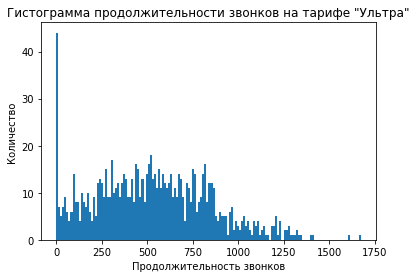

In [55]:
plt.title('Гистограмма продолжительности звонков на тарифе "Ультра"')
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество')
plt.hist(ultra_data['duration'], bins=150)
plt.show()

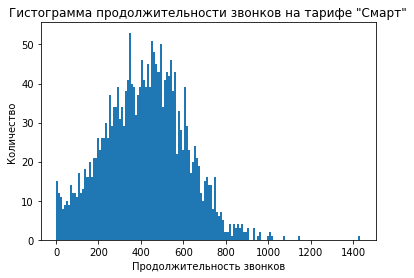

In [56]:
plt.title('Гистограмма продолжительности звонков на тарифе "Смарт"')
plt.xlabel('Продолжительность звонков')
plt.ylabel('Количество')
plt.hist(smart_data['duration'], bins=150);

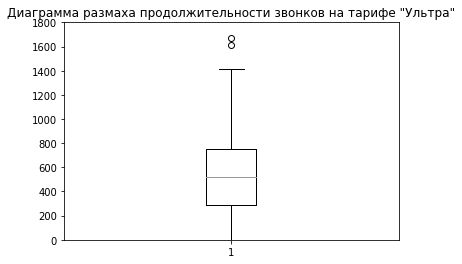

In [57]:
plt.title('Диаграмма размаха продолжительности звонков на тарифе "Ультра"')
plt.ylim(0, 1800)
plt.boxplot(ultra_data['duration']);

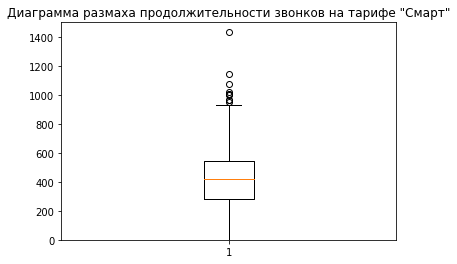

In [58]:
plt.title('Диаграмма размаха продолжительности звонков на тарифе "Смарт"')
plt.ylim(0, 1500)
plt.boxplot(smart_data['duration']);

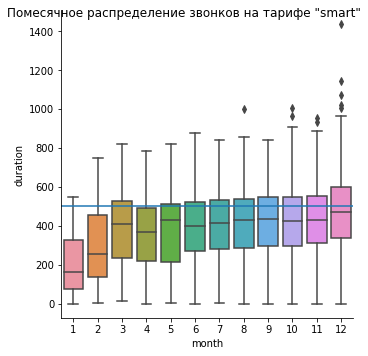

In [59]:
sns.catplot(x='month', y='duration', kind='box', data=smart_data).fig.suptitle('Помесячное распределение звонков на тарифе "smart"');
plt.gca().axhline(y=500)

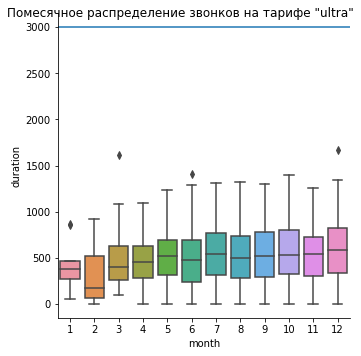

In [60]:
sns.catplot(x='month', y='duration', kind='box', data=ultra_data).fig.suptitle('Помесячное распределение звонков на тарифе "ultra"');
plt.gca().axhline(y=3000)

In [61]:
ultra_duration_variance = np.var(ultra_data['duration'])
print('Дисперсия продолжительности звонков у пользователей тарифа "Ультра":',ultra_duration_variance)

Дисперсия продолжительности звонков у пользователей тарифа "Ультра": 100771.2236172022


In [62]:
smart_duration_variance = np.var(smart_data['duration'])
print('Дисперсия продолжительности звонков у пользователей тарифа "Смарт":',smart_duration_variance)

Дисперсия продолжительности звонков у пользователей тарифа "Смарт": 36203.06665209469


In [63]:
ultra_data['duration'].describe()

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration, dtype: float64

In [64]:
smart_data['duration'].describe()

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration, dtype: float64

##### Интернет

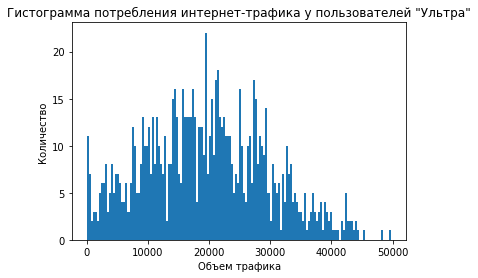

In [65]:
plt.title('Гистограмма потребления интернет-трафика у пользователей "Ультра"')
plt.xlabel('Объем трафика')
plt.ylabel('Количество')
plt.hist(ultra_data['mb_used'], bins=150);

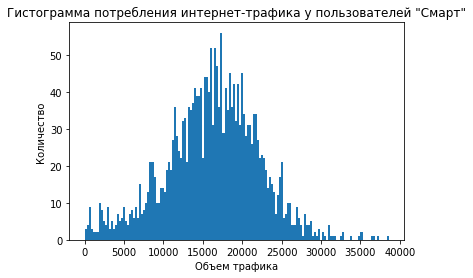

In [66]:
plt.title('Гистограмма потребления интернет-трафика у пользователей "Смарт"')
plt.xlabel('Объем трафика')
plt.ylabel('Количество')
plt.hist(smart_data['mb_used'], bins=150);

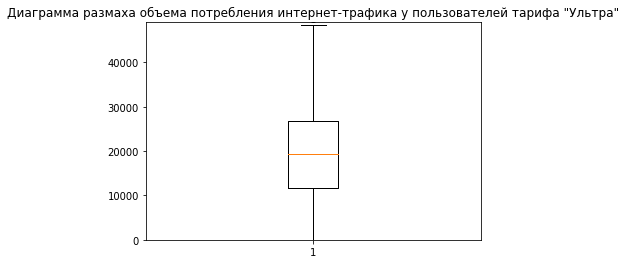

In [67]:
plt.title('Диаграмма размаха объема потребления интернет-трафика у пользователей тарифа "Ультра"')
plt.ylim(0, 49000)
plt.boxplot(ultra_data['mb_used']);

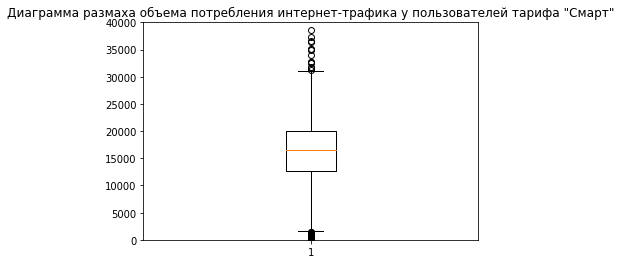

In [68]:
plt.title('Диаграмма размаха объема потребления интернет-трафика у пользователей тарифа "Смарт"')
plt.ylim(0, 40000)
plt.boxplot(smart_data['mb_used']);

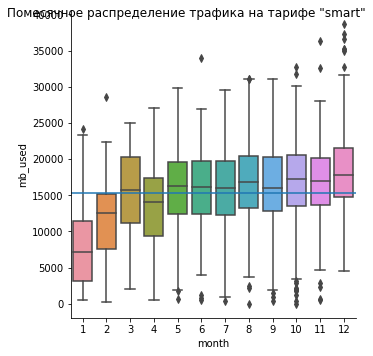

In [69]:

sns.catplot(x='month', y='mb_used', kind='box', data=smart_data).fig.suptitle('Помесячное распределение трафика на тарифе "smart"');
plt.gca().axhline(y=15*1024);

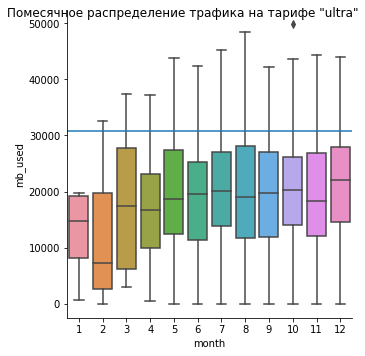

In [70]:
sns.catplot(x='month', y='mb_used', kind='box', data=ultra_data).fig.suptitle('Помесячное распределение трафика на тарифе "ultra"');
plt.gca().axhline(y=30*1024);

In [71]:
ultra_trafic_variance = np.var(ultra_data['mb_used'])
print('Дисперсия объема трафика у пользователей тарифа "Смарт":',ultra_trafic_variance)

Дисперсия объема трафика у пользователей тарифа "Смарт": 101832133.10806875


In [72]:
smart_trafic_variance = np.var(smart_data['mb_used'])
print('Дисперсия объема трафика у пользователей тарифа "Смарт":',smart_trafic_variance)

Дисперсия объема трафика у пользователей тарифа "Смарт": 34530412.73703965


In [73]:
ultra_data['mb_used'].describe()

count      985.000000
mean     19486.901523
std      10096.317202
min          0.000000
25%      11785.000000
50%      19324.000000
75%      26863.000000
max      49789.000000
Name: mb_used, dtype: float64

In [74]:
smart_data['mb_used'].describe()

count     2229.000000
mean     16229.188425
std       5877.576978
min          0.000000
25%      12658.000000
50%      16531.000000
75%      20068.000000
max      38610.000000
Name: mb_used, dtype: float64

##### Сообщения

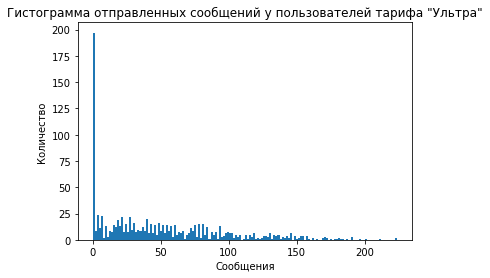

In [75]:
plt.title('Гистограмма отправленных сообщений у пользователей тарифа "Ультра"')
plt.xlabel('Сообщения')
plt.ylabel('Количество')
plt.hist(ultra_data['message_date'], bins=150);

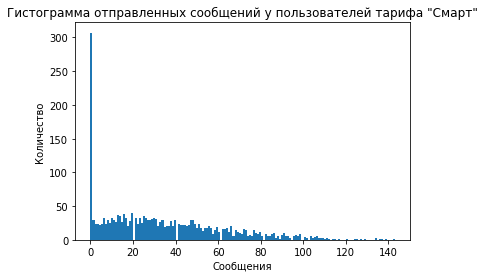

In [76]:
plt.title('Гистограмма отправленных сообщений у пользователей тарифа "Смарт"')
plt.xlabel('Сообщения')
plt.ylabel('Количество')
plt.hist(smart_data['message_date'], bins=150);

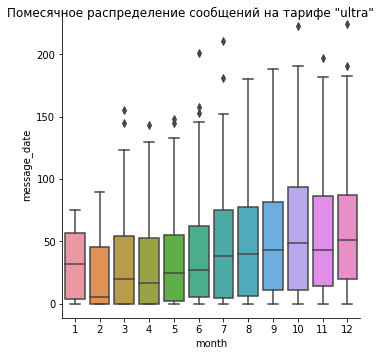

In [77]:
sns.catplot(x='month', y='message_date', kind='box', data=ultra_data).fig.suptitle('Помесячное распределение сообщений на тарифе "ultra"');


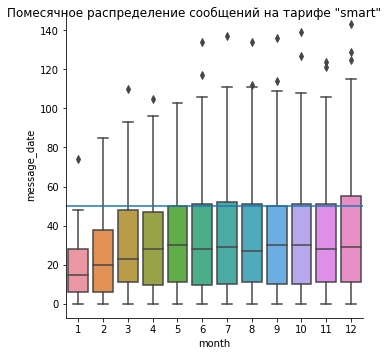

In [78]:
sns.catplot(x='month', y='message_date', kind='box', data=smart_data).fig.suptitle('Помесячное распределение сообщений на тарифе "smart"');
plt.gca().axhline(y=50)

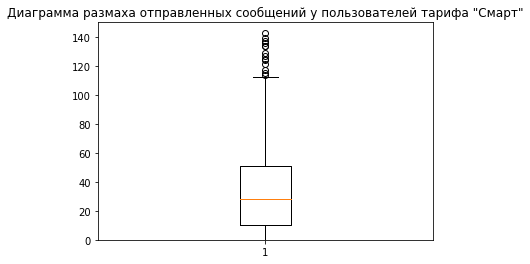

In [79]:
plt.title('Диаграмма размаха отправленных сообщений у пользователей тарифа "Смарт"')
plt.ylim(0, 150)
plt.boxplot(smart_data['message_date']);

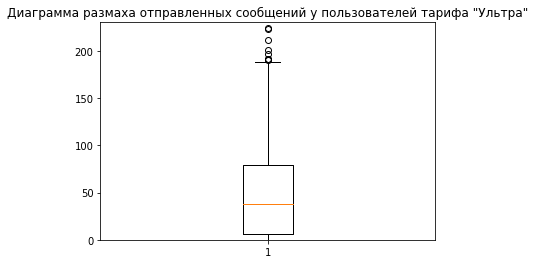

In [80]:
plt.title('Диаграмма размаха отправленных сообщений у пользователей тарифа "Ультра"')
plt.ylim(0, 230)
plt.boxplot(ultra_data['message_date']);

In [81]:
smart_msg_variance = np.var(smart_data['message_date'])
print('Дисперсия отправленных у пользователей тарифа "Смарт":',smart_msg_variance)

Дисперсия отправленных у пользователей тарифа "Смарт": 796.455482917076


In [82]:
ultra_msg_variance = np.var(ultra_data['message_date'])
print('Дисперсия объема трафика у пользователей тарифа "Ультра":',ultra_msg_variance)

Дисперсия объема трафика у пользователей тарифа "Ультра": 2282.946075394882


In [83]:
ultra_data['message_date'].describe()

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: message_date, dtype: float64

In [84]:
smart_data['message_date'].describe()

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: message_date, dtype: float64

### Вывод:  
---  
    - Количество пользователей с тарифом "Ультра" - 985 человек, с тарифом "Смарт" - 2229  
#### Звонки:  
---
    - У пользователей тарифа "Ультра" существенно больше случаев с 0 потраченных минут за месяц, при том, что самих пользователей тарифа "Ультра" меньше более чем в 2 раза    
    - Дисперсия продолжительности звонков у пользователей тарифа "Смарт" - 36203, у пользователей тарифа "Ультра" - 100771  
    - Среднее значение потраченных минут у пользователей тарифа "Ультра" - 526.6, медианное - 518.  
    - Среднее значение потраченных минут у пользователей тарифа "Смарт" - 417, медианное - 422.  
    - Помесячное распределение у пользователей с тарифом "Смарт" - меньше всего потраченных минут в январе, больше всего - в декабре. В августе, октябре, ноябре и декабре больше всего минут разговора сверх тарифного лимита.    
    - Помесячное распределение у пользователей с тарифом "Ультра" - также меньше всего потраченных минут в январе, больше всего - в декабре. За весь год у пользователей нет превышения минут сверх тарифного лимита.  
#### Интернет:  
---  
    - Дисперсия объема интернет-трафика у пользователей тарифа "Смарт" - 34530412, у пользователей тарифа 
    "Ультра" - 101832133  
    - Среднее значение объема интернет-трафика у пользователей тарифа "Ультра" - 19486.9, медианное - 19324.  
    - Среднее значение потраченных минут у пользователей тарифа "Смарт" - 16229.1, медианное - 16531.  
    - Помесячное распределение у пользователей с тарифом "Смарт" - В среднем во  все месяцы кроме января, февраля и апреля пользователи превышают объем трафика сверх тарифного лимита.  
    - Помесячное распределение у пользователей с тарифом "Ультра" - В январе нет превышения объема трафика сверх тарифного лимита, в остальные месяцы - средней уровень объема трафика около 20 Гб, но есть пользователи, которые используют больший объем трафика.  
####  Сообщения:  
    - У пользователей с тарифом "Смарт" больше случаев с 0 отправленных сообщений.  
    - Дисперсия отправленных сообщений у пользователей тарифа "Смарт" - 796.45, у пользователей тарифа "Ультра" - 2282  
    - Среднее значение отправленных сообщений у пользователей тарифа "Ультра" - 49.3, медианное - 38.  
    - Среднее значение отправленных сообщений у пользователей тарифа "Смарт" - 33, медианное - 28.  
    - Помесячное распределение у пользователей с тарифом "Смарт" - в среднем меньше всего отправленных сообщений в январе, больше всего - в декабре. Больше всего  отправленных сообщений сверх тарифного лимита в июле, августе и декабре.  
    - Помесячное распределение у пользователей с тарифом "Ультра" - в среднем меньше всего отправленных сообщений в феврале, больше всего - в декабре. На протяжении всего года нет случаев отправленных сообщений сверх тарифного лимита.  
    

### Шаг 4. Проверка гипотез

Гипотеза №1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

Для возможности отвергнуть или не отвергать гипотезы №1 сформулируем нулевую гипотезу: "Средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт равны между собой".   
Альтернативной будет гипотеза: "Средняя выручка пользователей тарифа "Ультра" не равна средней выручке пользователей тарифа "Смарт".

In [85]:
ultra_data.head()

,user_id,month,rub_monthly_fee,city,duration,overlimit,pay_for_overlimit,message_date,msg_overlimit,pay_for_msg_overlimit,mb_used,traffic_overlimit,pay_for_traffic_overlimit,monthly_revenue
0,1000,5,1950,Краснодар,159,0,0,22,0,0,2256,0,0,1950
1,1000,6,1950,Краснодар,172,0,0,60,0,0,23257,0,0,1950
2,1000,7,1950,Краснодар,340,0,0,75,0,0,14016,0,0,1950
3,1000,8,1950,Краснодар,408,0,0,81,0,0,14070,0,0,1950
4,1000,9,1950,Краснодар,466,0,0,57,0,0,14581,0,0,1950


In [86]:
# Для проверки нулевой гипотезы используем метод ttest_ind
alpha = .02

results = st.ttest_ind(
    ultra_data['monthly_revenue'], 
    smart_data['monthly_revenue'], 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.7240946993530846e-246
Отвергаем нулевую гипотезу


Гипотеза №2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Для возможности отвергнуть или не отвергать гипотезу №2 сформулируем нулевую гипотезу: "Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов равны между собой".
Альтернативной будет гипотеза: "Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов".

In [87]:
# Для проверки гипотезы №2 создадим 2 выборки данных по регионам
moscow = swot_data.query('city == "Москва"').copy()
other_region = swot_data.query('city != "Москва"').copy()

In [88]:
len(moscow)

611

In [89]:
len(other_region)

2603

In [90]:
# Для проверки нулевой гипотезы используем метод ttest_ind
alpha = .02

results = st.ttest_ind(
    moscow['monthly_revenue'], 
    other_region['monthly_revenue'], 
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5126564657748214
Не получилось отвергнуть нулевую гипотезу


### Шаг 5. Общий вывод.  
---  
    - У пользователей тарифа "Ультра" нет перерасхода по звонкам и сообщениям, перерасход только за интернет-трафик (в январе перерасхода по трафику нет).  
    - У пользователей тарифа "Ультра" чаще случаи с 0 потраченных минут за месяц  
    - У пользователей с тарифом "Смарт" больше случаев с 0 отправленных сообщений.  
    - Дисперсия количества минут, объема трафика и отправленных сообщений У пользователей с тарифом "Ультра" больше почти в 3 раза.  
    - У пользователей с тарифом "Смарт" нет случаев перерасхода отправленных сообщений только в январе.  
#### Вывод:  
Можно сделать вывод, что пользователи с тарифом "Ультра" меньше пользуются звонками, но отправляют больше сообщений и больше пользуются интернетом, чем пользователи с тарифом "Смарт". 

#### Проверка гипотез:  
##### Гипотеза №1: "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается":  
    Для проверки данной гипотезы была сформулирована нулевая гипотеза: "Средняя выручка пользователей тарифа "Ультра" и средняя выручка пользователей тарифа "Смарт" равны между собой". 
    Для опровержения гипотезы №1 нулевая гипотеза не должна быть опровергнута.  
    С помощью метода ttest_ind проверяем на равенство выборки с средней выручкой пользователей тарифа "Ультра" и  пользователей тарифа "Смарт", указав параметр equal_var = False т.к. выборки не равны между собой.  
    Результат проверки - отвергаем нулевую гипотезу, соответственно гипотезу №1 мы опровергнуть не можем, соответственно можно предположить, что в среднем выручки пользователей тарифов «Ультра» и «Смарт» различаются  
##### Гипотеза №2: "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"
    Для проверки данной гипотезы была сформулирована нулевая гипотеза: "Средняя выручка пользователей из Москвы и средняя выручка пользователей из других регионов равны между собой".  
    Для опровержения гипотезы №2 нулевая гипотеза должна быть опровергнута.  
    Были созданы две выборки: с данными по Москве и данными по другим регионам. С помощью метода ttest_ind проверяем на равенство выборки с средней выручкой пользователей из Москвы и  пользователей из других регионов, указав параметр equal_var = False т.к. выборки не равны между собой.  
    Результат проверки - Не получилось отвергнуть нулевую гипотезу. По результатам проверки не удалось отвергнуть нулевую гипотезу, следовательно нет оснований полагать, что выручки абонентов Москвы и других регионов различаются